In [14]:
from PIL import Image
import os
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
import numpy as np
import pandas as pd
from IPython.display import display, Markdown

ATTENTION_GIF_DIR_DIR = f"V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention"
ATTENTION_IMG_DIR = f"V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_imgs"

In [2]:
def split_gif_to_frames(gif_path, output_folder):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    with Image.open(gif_path) as gif:
        frame_count = gif.n_frames
        print(f"Total frames: {frame_count}")

        for frame in range(frame_count):
            gif.seek(frame)
            frame_filename = os.path.join(output_folder, f"frame_{frame:03d}.png")
            gif.save(frame_filename, format="PNG")
            print(f"Saved: {frame_filename}")

In [5]:
subfolders = os.listdir(ATTENTION_GIF_DIR_DIR)

In [8]:
os.makedirs(ATTENTION_IMG_DIR)

In [9]:
for i, sub in enumerate(subfolders):
    gif_path = f"{ATTENTION_GIF_DIR_DIR}/{sub}/{sub}.gif"
    output_folder = f"{ATTENTION_IMG_DIR}/{sub}"
    print(f"{i+1} / {len(subfolders)}: converting {sub} ...")
    split_gif_to_frames(gif_path, output_folder)

1 / 25: converting serie_1.2.840.113654.2.55.145385352624582326596824382275465435553 ...
Total frames: 136
Saved: V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_imgs/serie_1.2.840.113654.2.55.145385352624582326596824382275465435553\frame_000.png
Saved: V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_imgs/serie_1.2.840.113654.2.55.145385352624582326596824382275465435553\frame_001.png
Saved: V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_imgs/serie_1.2.840.113654.2.55.145385352624582326596824382275465435553\frame_002.png
Saved: V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_imgs/serie_1.2.840.113654.2.55.145385352624582326596824382275465435553\frame_003.png
Saved: V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_attentions/attention_imgs/serie_1.2.840.113654.2.55.145385352624582326596824382275465435553\frame_004.png
Saved: V:/experiments/lung-malign

In [10]:
def get_frames_from_gif(gif_path):
    gif = Image.open(gif_path)
    frames = []
    while True:
        frames.append(np.array(gif))
        try:
            gif.seek(gif.tell() + 1)
        except EOFError:
            break
    
    return frames

In [11]:
def show_gif_slider(gif_path):
    # Load the GIF using PIL (Pillow)
    frames = get_frames_from_gif(gif_path)

    # Number of frames in the GIF
    num_frames = len(frames)

    fig, ax = plt.subplots(figsize=(6, 6))
    plt.subplots_adjust(bottom=0.25)
    im = ax.imshow(frames[0], cmap='gray')
    ax.axis('off')

    # Add the slider
    ax_slider = plt.axes([0.1, 0.02, 0.8, 0.03], facecolor='lightgoldenrodyellow')
    slider = Slider(ax_slider, 'Frame', 0, num_frames-1, valinit=0, valstep=1)

    # Update function for the slider
    def update(val):
        frame_idx = int(slider.val)
        im.set_data(frames[frame_idx])
        fig.canvas.draw_idle()

    # Attach the update function to the slider
    slider.on_changed(update)
    plt.show()

In [12]:
df = pd.read_csv(f"V:/experiments/lung-malignancy-fairness-shaurya/nlst/sybil_fn_brock_top25.csv")

### 1.2.840.113654.2.55.158391584353757200962479457670501546291

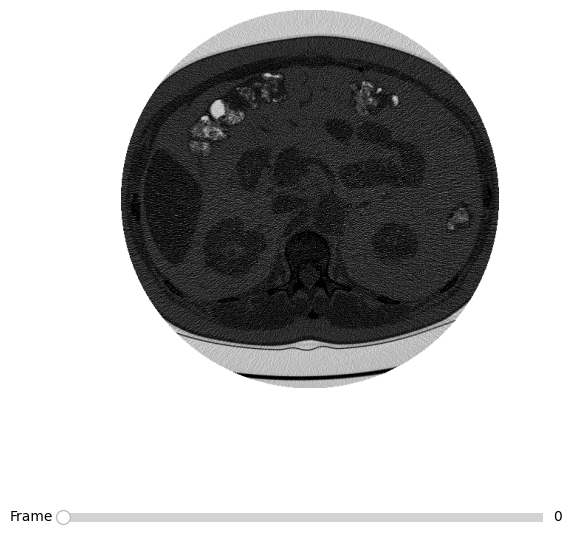

Age                           68
Gender                         1
race                         NaN
FamilyHistoryLungCa         True
Emphysema                  False
Diameter [mm]               63.7
NoduleInUpperLung           True
PartSolid                  False
NoduleCounts                   1
Spiculation                False
weight                       NaN
BMI                          NaN
Adenocarcinoma             False
Squamous_cell_carcinoma     True
diaghype                     NaN
wrkasbe                      NaN
wrkfoun                      NaN
cigar                        NaN
pipe                         NaN
Name: 0, dtype: object

In [15]:
pancan_cols = ['Age', 'Gender', 'race', 'FamilyHistoryLungCa', 'Emphysema', 'Diameter [mm]', 'NoduleInUpperLung', 'PartSolid', 'NoduleCounts', 'Spiculation']
cols_to_show = pancan_cols + ['weight', 'BMI', 'Adenocarcinoma', 'Squamous_cell_carcinoma', 'diaghype', 'wrkasbe', 'wrkfoun', 'cigar', 'pipe']

for i in range(1):
    seriesuid = df['SeriesInstanceUID'][i]
    display(Markdown(f"### {seriesuid}"))
    gif_path = f"{ATTENTION_GIF_DIR_DIR}/serie_{seriesuid}/serie_{seriesuid}.gif"
    show_gif_slider(gif_path)
    display(df.iloc[i][cols_to_show])